# Web Scraping Indeed.com - Extracting Job Posting Data

## Task: Scrape data from a job search website

Website: Indeed.com

Objective: Collect job postings that match certain keywords and location filters, and then perform data analysis to extract insights about the job market.

Process:

1. Choose a location and a set of keywords that are relevant to a specific field of study.
2. Scrape job postings from Indeed.com using selenium and python. The code should extract the following information for each job posting:
- Job title
- Company name
- Job description
- Job location
- Date posted
3. Clean and preprocess the data as necessary. 
4. Use data analysis techniques to extract insights about the job market. For example,
- Identify which companies are hiring the most for the given job titles and locations.
- Determine the distribution of job titles and their average salaries.
- Analyze the frequency of certain keywords in job descriptions, and determine which skills and qualifications are most in demand.
5. Write a report summarizing the findings. 

In [1]:
from selenium import webdriver
import pandas as pd
import re
import time 
import random
import matplotlib.pyplot as plt

# 1. Introduction
Collecting Software Engineer job postings in Seattle, WA, San Francisco, CA, and New York City, NY with annual salaries higher than $105,000.

# 2. Scraping data

In [2]:
def getPostings(start, url):
    # this function gets all the job postings in a single page
    postings = []
    driver = webdriver.Chrome('/Users/hochl/Downloads/driver/chromedriver')
    driver.get(url + str(start))
    job_title_elements = driver.find_elements("xpath", "//*[contains(@id, 'jobTitle-')]")
    title_index = 0
    for i in range(1, 18):
        if i == 6 or i == 12:
            continue
    
        # get job title
        try:
            job_title = job_title_elements[title_index].text
        except:
            job_title = "N/A"
        title_index += 1

        # get company's name
        try:
            company_name_element = driver.find_element("xpath", '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(i) + ']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/span[1]')
            company_name = company_name_element.text
        except:
            company_name = "N/A"

        # get job description
        try:
            job_description_element = driver.find_element("xpath", '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(i) + ']/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div[1]/div')
            job_description = job_description_element.text
        except:
            job_description = "N/A"

        # get location
        try:
            job_location_element = driver.find_element("xpath", '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(i) + ']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/div[1]')
            job_location = job_location_element.text.split('\n')[0]
        except: 
            job_location = "N/A"
        
        # get salary
        try:
            salary_element = driver.find_element("xpath", '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(i) + ']/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[3]/div[1]')
            salary = salary_element.text
        except:
            salary = "N/A"

        # get date
        try:
            date_element = driver.find_element("xpath", '//*[@id="mosaic-provider-jobcards"]/ul/li[' + str(i) + ']/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div[1]/span[1]')
            date = date_element.text.split('\n')[1]
        except:
            date = "N/A"

        postings.append([job_title, company_name, job_description, job_location, salary, date])
    driver.quit() 
    return postings
    

In [ ]:
# scrape 101 job posting pages
df_out = pd.DataFrame() # an empty dataframe

# get Software Engineer job postings in Seattle, WA
for start in range(0, 370, 10):
    postings = getPostings(start, "https://www.indeed.com/jobs?q=software+engineer+%24105%2C000&l=Seattle%2C+WA&radius=50&start=")

    df_single = pd.DataFrame(postings, columns=['title', 'company', 'description', 'location', 'salary', 'date'])

    df_out = pd.concat([df_out, df_single])
    
    time.sleep(random.uniform(2,3))

# get Software Engineer job postings in San Francisco, CA
for start in range(0, 370, 10):
    postings = getPostings(start, "https://www.indeed.com/jobs?q=software+engineer+%24105%2C000&l=San+Francisco%2C+CA&radius=50&start=")

    df_single = pd.DataFrame(postings, columns=['title', 'company', 'description', 'location', 'salary', 'date'])

    df_out = pd.concat([df_out, df_single])
    
    time.sleep(random.uniform(2,3))
    
# get Software Engineer job postings in New York City, NY
for start in range(0, 370, 10):
    postings = getPostings(start, "https://www.indeed.com/jobs?q=software+engineer+%24105%2C000&l=New+York%2C+NY&radius=50&start=")

    df_single = pd.DataFrame(postings, columns=['title', 'company', 'description', 'location', 'salary', 'date'])

    df_out = pd.concat([df_out, df_single])
    
    time.sleep(random.uniform(2,3))
     

# 3. Cleaning data

In [46]:
# modify description column, in case there are multiple rows in short description, separating by '; '
df_out['description'] = df_out['description'].str.replace('\n', '; ') 

# remove duplicates
df_out = df_out.drop_duplicates() 

# clean the salary column, just keep annual salary
df_out = df_out[df_out["salary"].str.contains("year")]

# clean the location column: All cities in Greater Seattle Area (Seattle, Bellevue, Redmon, etc) are changed 
# to Seattle, WA; All cities within SF Bay Area are changed to San Francisco; All boroughs within NYC and all cities 
# near NYC are categorized as New York City, NY
df_out.loc[df_out['location'].str.contains('WA'), 'location'] = 'Seattle, WA'
df_out.loc[df_out['location'].str.contains('CA'), 'location'] = 'San Francisco, CA'
df_out.loc[df_out['location'].str.contains('California'), 'location'] = 'San Francisco, CA'
df_out.loc[df_out['location'].str.contains('NY'), 'location'] = 'New York City, NY'
df_out.loc[df_out['location'].str.contains('CT'), 'location'] = 'New York City, NY'

# reset df indexes and drop the unnecessary column
df_out = df_out.reset_index().drop('index', axis=1) 


In [47]:
df_out

,title,company,description,location,salary,date
0,Senior Software Engineer - Firmware,Peloton,An understanding in software engineering best ...,"Seattle, WA",Estimated $149K - $189K a year,Posted 30+ days ago
1,Software Engineer,Microsoft,Work on specific software features or sections...,"Seattle, WA","$127,338 - $147,338 a year",Active 7 days ago
2,Statistical Programmer II/III,Fred Hutchinson Cancer Research Center,The incumbent primarily uses SAS with experien...,"Seattle, WA",Estimated $97.3K - $123K a year,Posted 30+ days ago
3,Software Development Engineer,MYGRANT GLASS COMPANY INC,Evaluate existing software systems to ascertai...,"Seattle, WA","$120,000 - $150,000 a year",Posted 4 days ago
4,Senior Software Development Engineer,The Pokémon Company International,Translate business requirements into engineeri...,"Seattle, WA",Estimated $144K - $183K a year,Posted 5 days ago
...,...,...,...,...,...,...
1336,Senior Software Developer,Avis Budget Group,Overall 7+ years’ experience as software engin...,"New York City, NY",Estimated $98K - $124K a year,Posted 2 days ago
1337,Software Engineer/Software Developers,Neoitek Systems Inc,Education: Minimum of Bachelor’s or Higher deg...,"New York City, NY",Estimated $97.6K - $124K a year,Posted 30+ days ago
1338,Software Developer,Technet,"Software Developer: - Design, develop, test an...","New York City, NY",Estimated $104K - $132K a year,Posted 30+ days ago
1339,"Senior Software Engineer, iOS",Saturn,Candidates MUST currently be authorized to wor...,"New York City, NY","$165,000 - $210,000 a year",Posted 30+ days ago


# 4. Data analysis

First, let's look at the summary of the data

In [48]:
df_out.describe()

,title,company,description,location,salary,date
count,1341,1341,1341,1341,1341,1341
unique,839,869,1291,3,716,49
top,Software Engineer,TikTok,Who is Recruiting from Scratch: Recruiting fro...,"San Francisco, CA","$120,000 - $160,000 a year",Posted 30+ days ago
freq,110,24,4,459,13,760


Upon analyzing the data set, it reveals that there are a total of 1341 job postings with 839 distinct types of software engineers currently employed in the job market. Now, to gain valuable insights from this information, am attempting to answer several key questions:
- Firstly, which software engineering positions are in highest demand presently? 
- Secondly, as I am considering a career as a Full-stack software engineer, I am deliberating between Seattle and San Francisco for potential job prospects. I will investigate which location offers more Full-stack SWE job postings.
- Lastly, I will also identify the companies that are currently hiring the most.

In [92]:
# Which positions are on the highest demand?
df_out.title.value_counts()

Software Engineer                        110
Senior Software Engineer                  68
Staff Software Engineer                   20
Backend Engineer                          19
Machine Learning Engineer                 18
                                        ... 
Senior Database Software Engineer          1
Creative Technologist, R&D                 1
Lead Front End Engineer                    1
Sr App Development Analyst                 1
C++ Developer (Securitized Products )      1
Name: title, Length: 839, dtype: int64

The data analysis reveals that Junior and Mid-level Software Engineers are in the highest demand, with 110 job postings, almost double the demand for Senior Software Engineers. This information suggests that there is a strong demand for entry-level and mid-level talent in the Software Engineering field.

Following Junior and Mid-level positions, Staff Software Engineer positions are also in demand, although to a lesser extent. It is worth noting that these trends may vary across industries and companies, and job seekers should research the specific job market in their field of interest.



In [93]:
# Which area has greater Full-stack job posting?
df_new = df_out[df_out['title'].str.contains('Full Stack')]
print(df_new.groupby('location').size())

location
New York City, NY    20
San Francisco, CA    17
Seattle, WA          23
dtype: int64


Based on the analysis of job postings, Seattle appears to have a greater demand for Full-stack software engineers compared to San Francisco. This makes Seattle an attractive destination for job seekers interested in pursuing a career in this field. However, it's crucial to note that job seekers should not solely rely on job postings data to make a decision. They should conduct thorough research and evaluate other factors such as cost of living, job market trends, company culture, and opportunities for growth and development. 

In [94]:
# Top 10 companies that are hiring the most on the market
df_out.company.value_counts()[:10]

TikTok                     24
Recruiting From Scratch    16
CyberCoders                13
SpaceX                     11
Hive                       10
Tesla                       9
Meta                        9
Costco Wholesale            8
Microsoft                   8
Cash App                    8
Name: company, dtype: int64

Based on our inspection of job openings, TikTok currently appears to be the top employer in the three areas we examined, with 24 job postings. It is a significant number that reflects the company's growth and expansion plans. Microsoft has eight job openings, which is a relatively smaller number than TikTok. 

Meta, formerly known as Facebook, faced a massive layoff in 2021, but their recent hiring of nine software engineering positions suggests that the company is on a path to recovery and is looking to expand its workforce. This hiring activity is a positive sign for job seekers in the tech industry.




# 5. Summarizing Report

Text(0.5, 1.0, 'Jobs posting by location')

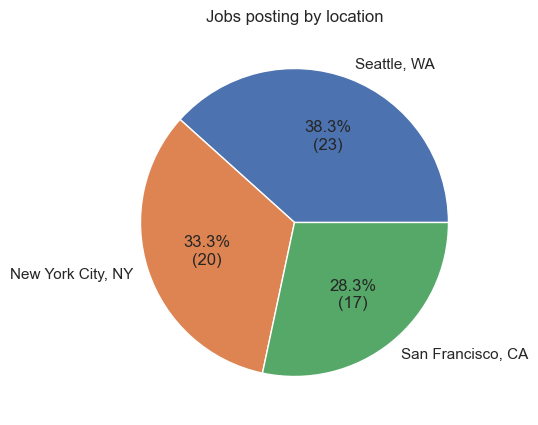

In [83]:
# Job posting by location

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

fig = plt.figure(figsize = (10, 5))
df_new = df_out[df_out['title'].str.contains('Full Stack')]
s = df_new["location"].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

# Edit the axes
plt.title('Jobs posting by location')

Based on the pie chart above, it can be observed that the Greater Seattle Area has the largest number of job postings for Full-stack Software Engineer, accounting for over one third of the total. New York City and the San Francisco Bay Area follow closely behind. However, the percentage difference between these areas is not significantly different.

Text(0.5, 0, 'Job title')

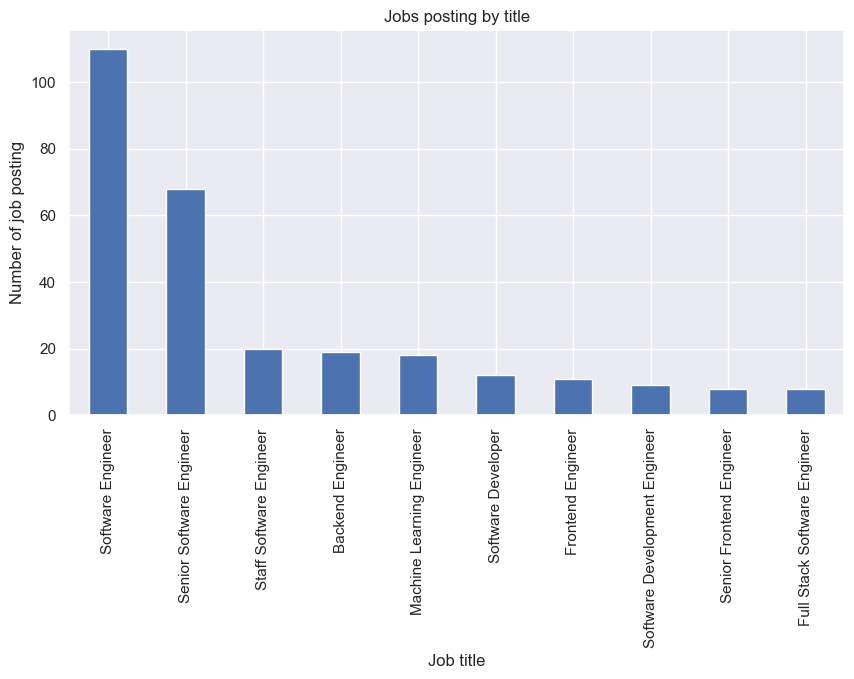

In [84]:
# Choose top 10 most needed job titles and visualize their distribution

fig = plt.figure(figsize = (10, 5))
df_top10 = df_out['title'].value_counts()[:10]
df_top10.plot(kind='bar')

# Edit the axes
plt.title('Jobs posting by title')
plt.ylabel('Number of job posting')
plt.xlabel('Job title')

Text(0.5, 0, 'Posting date')

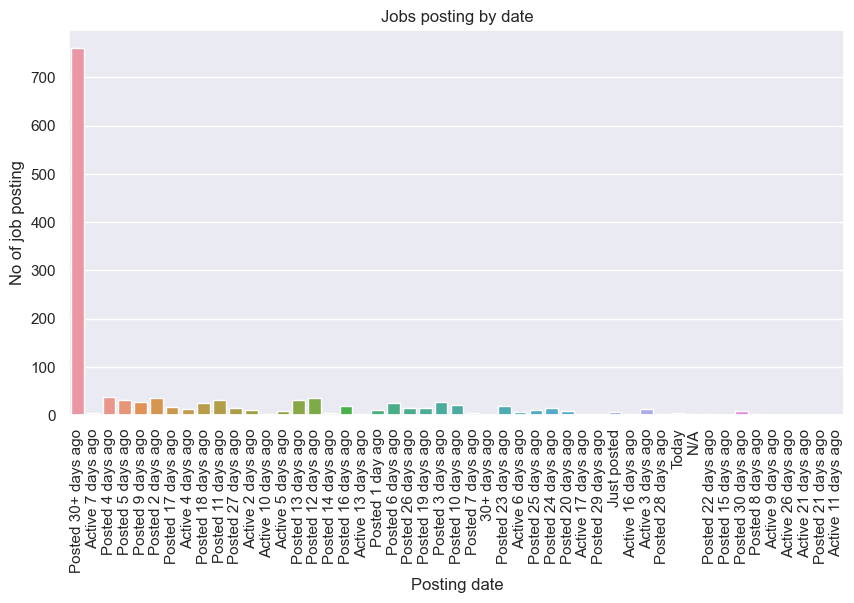

In [59]:
# Job posting by date 

# creating the bar plot
fig = plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")
ax = sns.countplot(x="date", data=df_out)
plt.xticks(rotation = 90)

# Edit the axes
plt.title('Jobs posting by date')
plt.ylabel('Number of job posting')
plt.xlabel('Posting date')

In conclusion, the data set suggests that the Full-stack Software Engineering job market is stronger in the Greater Seattle Area than in the Bay Area. The demand for mid-level and junior Software Engineers is the highest, followed by Senior Software Engineers.

Furthermore, the job postings reached their peak 30+ days ago, and the number of available positions tends to decrease over time. Therefore, job seekers should be proactive and apply as early as possible to maximize their chances of securing a position.

It is important to note that while the data set provides valuable insights into the current job market, it may not represent the complete picture. Other factors such as industry trends, company hiring practices, and economic conditions can impact job availability. As such, job seekers should conduct further research and gather additional information before making any career decisions.